## Loading the image file from the Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


In [3]:
%cd "/content/drive/My Drive/Colab Notebooks/deep-learning-group-Jiffar"

/content/drive/My Drive/Colab Notebooks/deep-learning-group-Jiffar


In [0]:
import autoreload
%load_ext autoreload

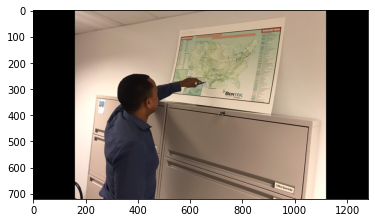

In [18]:
#test image loading
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread("/content/drive/My Drive/image5.png")
img_cvt=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_cvt)

plt.show()

In [0]:
%reload_ext autoreload

In [0]:
import helpers

In [7]:
!pwd

/content/drive/My Drive/Colab Notebooks/deep-learning-group-Jiffar


In [0]:
import glob
import cv2
import numpy as np
import os


from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, AveragePooling2D
from tensorflow.keras.models import Model
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline, FeatureUnion
from tensorflow.keras.callbacks import EarlyStopping

In [0]:
DATA_DIR = '/content/drive/My Drive/Colab Notebooks/yoga_poses'

miniBatchSize = 16
colorMode = 'rgb'
classMode = "categorical"
imgSize = 256


datagen = ImageDataGenerator(rotation_range=20,
                             width_shift_range=0.1,
                             height_shift_range=0.1, 
                             rescale=1./255,
                             zoom_range=0.3,
                             validation_split=0.3,
                             horizontal_flip=True)

In [15]:
train_generator = datagen.flow_from_directory(DATA_DIR,
                                            target_size=(imgSize, imgSize),
                                            color_mode=colorMode,
                                            class_mode=classMode,
                                            batch_size=miniBatchSize,
                                            subset='training')

validation_generator = datagen.flow_from_directory(DATA_DIR,
                                            target_size=(imgSize, imgSize),
                                            color_mode=colorMode,
                                            class_mode=classMode,
                                            batch_size=miniBatchSize,
                                            subset='validation')

Found 4243 images belonging to 107 classes.
Found 1751 images belonging to 107 classes.


In [0]:
# #bring data from drive
# !unzip -uq "/content/drive/My Drive/yoga_poses.zip" -d "/content/drive/My Drive/"

In [0]:
augmented_images = [train_generator[0][0][0] for i in range(5)]

In [27]:
helpers.plotImages(augmented_images, img_size=imgSize)

## Making the model

In [33]:
train_generator

In [34]:
type(train_generator)

keras_preprocessing.image.directory_iterator.DirectoryIterator

In [35]:
np.array(augmented_images).shape

(5, 256, 256, 3)

In [38]:
train_generator.shape

AttributeError: ignored

In [40]:
type(train_generator[0])

tuple

In [44]:
np.array(train_generator[0]).shape

ValueError: ignored

In [43]:
np.array(train_generator[0][0]).shape

(16, 256, 256, 3)

In [45]:
np.array(train_generator[0][0][0]).shape

(256, 256, 3)